In [1]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
mat = scipy.io.loadmat('./data/extracellular.mat')
signal_data = mat['all_data_with_noise_and_line'][0]

In [3]:
signal_data.shape

(4632000,)

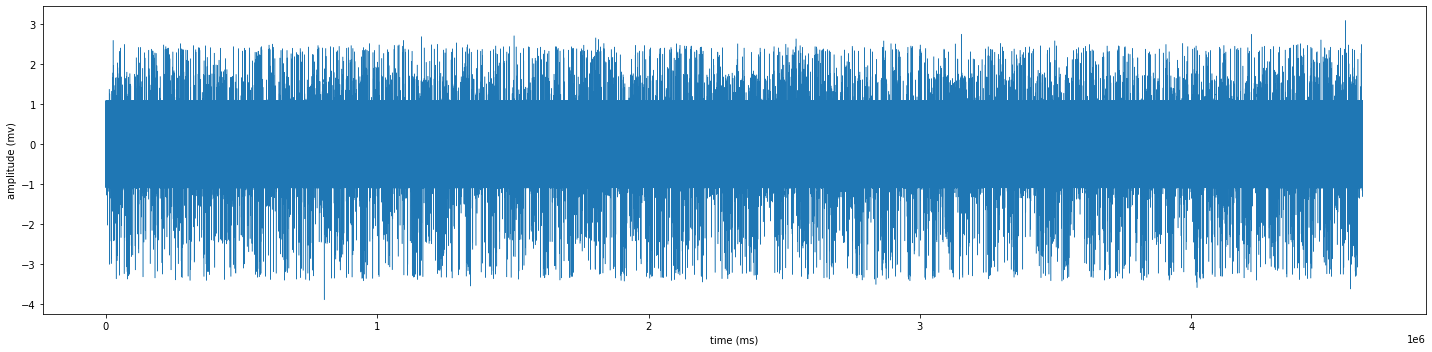

In [4]:
plt.rcParams["figure.figsize"] = [20, 5]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
plt.plot(signal_data, linewidth = '0.5')
plt.xlabel("time (ms)")
plt.ylabel("amplitude (mv)")
plt.show()

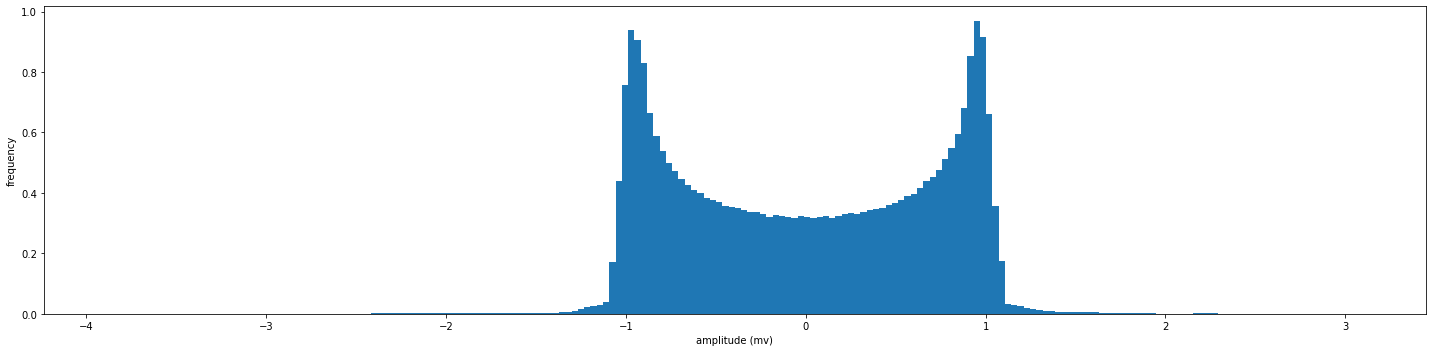

In [5]:
plt.hist(signal_data,bins=200,log = False, density= True)
plt.xlabel('amplitude (mv)')
plt.ylabel('frequency')
plt.show()

In [6]:
from scipy import signal
max_sample_rate = 2400
cut_off_rate = 300
Wn = cut_off_rate/(max_sample_rate * 0.5)
b, a = signal.butter(7, Wn,btype='highpass')
signal_data_filterd = scipy.signal.filtfilt(b, a, signal_data)

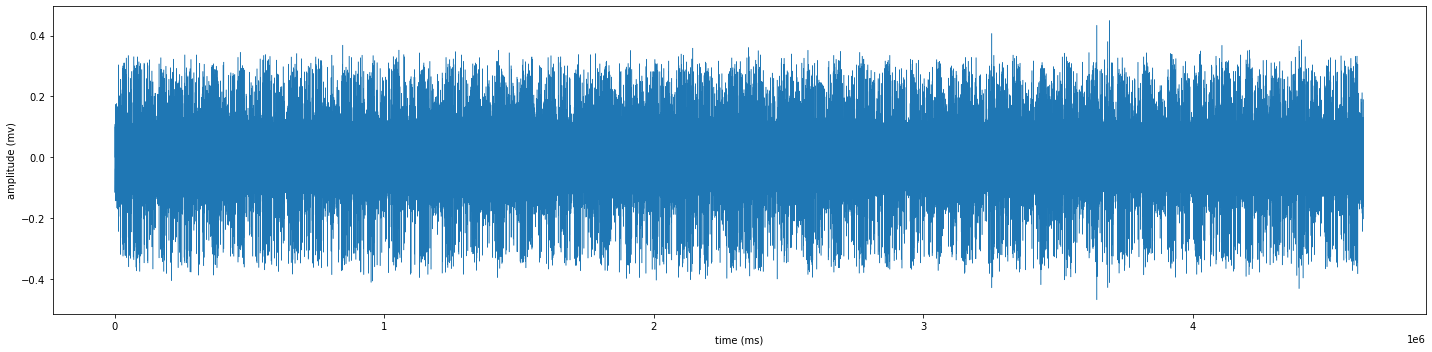

In [7]:
plt.rcParams["figure.figsize"] = [20, 5]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
plt.plot(signal_data_filterd, linewidth = '0.5')
plt.xlabel("time (ms)")
plt.ylabel("amplitude (mv)")
plt.show()

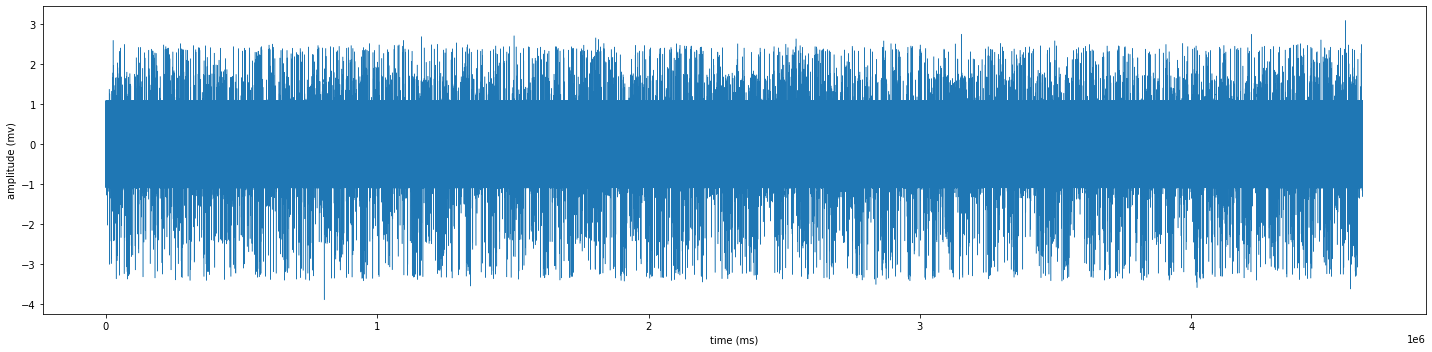

In [8]:
plt.rcParams["figure.figsize"] = [20, 5]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
plt.plot(signal_data, linewidth = '0.5')
plt.xlabel("time (ms)")
plt.ylabel("amplitude (mv)")
plt.show()

In [9]:
sigma_n = np.median(np.absolute(signal_data_filterd)/0.6745)
theta = sigma_n*5
theta

0.2165574093076941

In [10]:
gradient = np.gradient(signal_data_filterd)
peaks_index = []
for i in range(0,len(gradient)-1):
     if (gradient[i-1] * gradient[i]) < 0:
        peaks_index.append(i)

In [11]:
peaks_index_th = []
for i in peaks_index:
    if signal_data_filterd[i] >=theta:
        peaks_index_th.append(i)
        
len(peaks_index_th)

2056

In [12]:
# peaks_waveform = []
# for i in peaks_index_th:
#     a = -5
#     for j in range(0,10):
#         a = a+j
#         peaks_waveform.append(signal_data_filterd[a+i])
        
# len(peaks_waveform)

In [13]:
peaks_waveform = []
for i in peaks_index_th:
    a = -5
    for j in range(0,10):
        peaks_waveform.append(signal_data_filterd[a+i+j])
        
len(peaks_waveform)

20560

In [14]:
peaks_waveform = np.array(peaks_waveform)

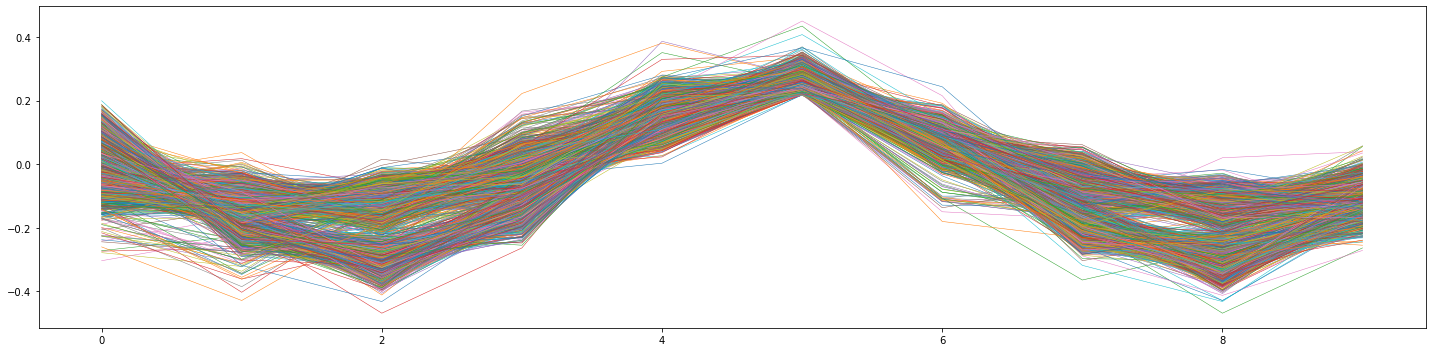

In [15]:
index = 0
for i in range(0,int(len(peaks_waveform)/10)):
    plt.plot(peaks_waveform[index:index+10],linewidth=0.5)
    index = index+10
    
plt.show()

In [16]:
n = peaks_waveform.shape
peaks_waveform = peaks_waveform.reshape(int(int(n[0])/10),10)

In [17]:
peaks_waveform.shape

(2056, 10)

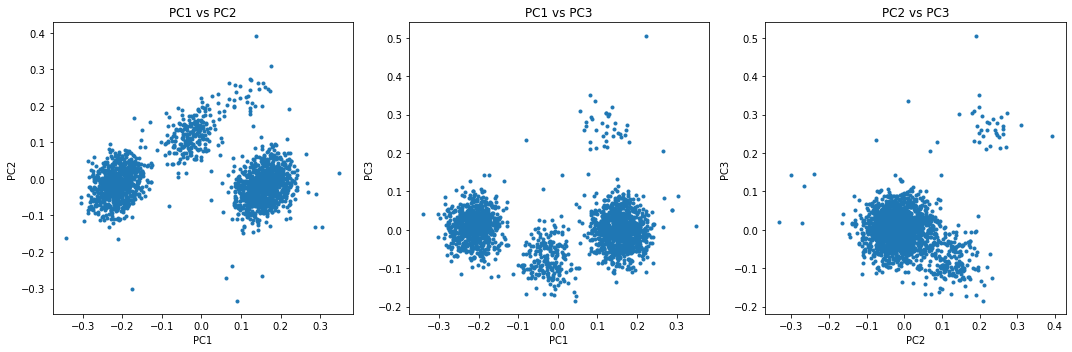

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_waves = pca.fit_transform(peaks_waveform)

plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.plot(pca_waves[:,0], pca_waves[:,1],'.')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PC1 vs PC2')
plt.subplot(1, 3, 2)
plt.plot(pca_waves[:,0], pca_waves[:,2],'.')
plt.xlabel('PC1')
plt.ylabel('PC3')
plt.title('PC1 vs PC3')
plt.subplot(1, 3, 3)
plt.plot(pca_waves[:,1], pca_waves[:,2],'.')
plt.xlabel('PC2')
plt.ylabel('PC3')
plt.title('PC2 vs PC3')
plt.show()

In [19]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=3).fit(pca_waves)
labels = kmeans.labels_

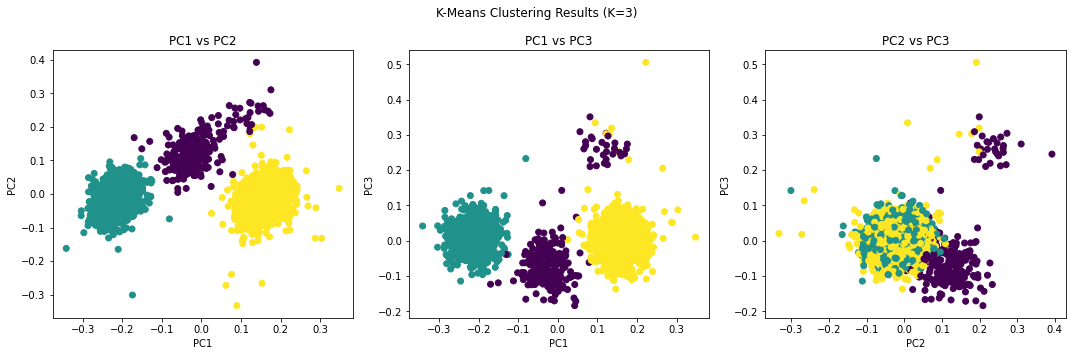

In [20]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].scatter(pca_waves[:, 0], pca_waves[:, 1], c=labels, cmap='viridis')
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[0].set_title('PC1 vs PC2')
fig.suptitle(f'K-Means Clustering Results (K=3)')

ax[1].scatter(pca_waves[:, 0], pca_waves[:, 2], c=labels, cmap='viridis')
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC3')
ax[1].set_title('PC1 vs PC3')
    
ax[2].scatter(pca_waves[:, 1], pca_waves[:, 2], c=labels, cmap='viridis')
ax[2].set_xlabel('PC2')
ax[2].set_ylabel('PC3')
ax[2].set_title('PC2 vs PC3')

plt.show()

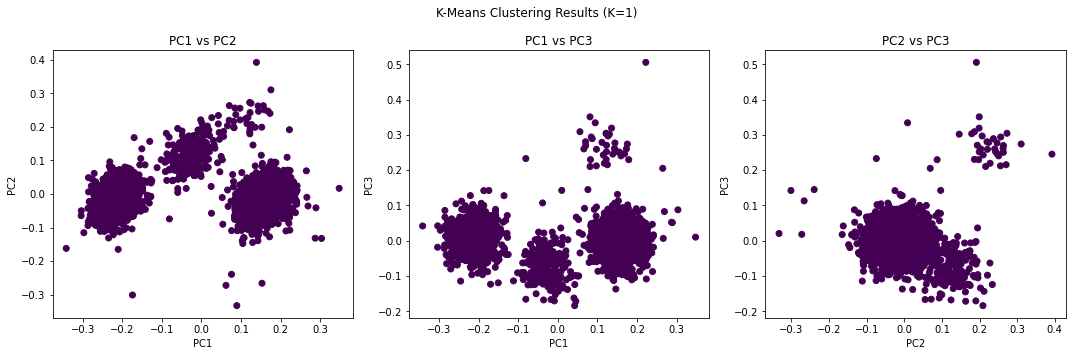

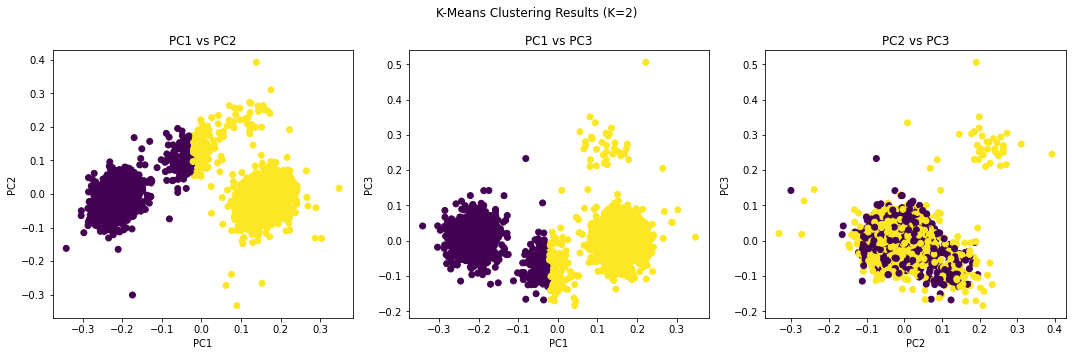

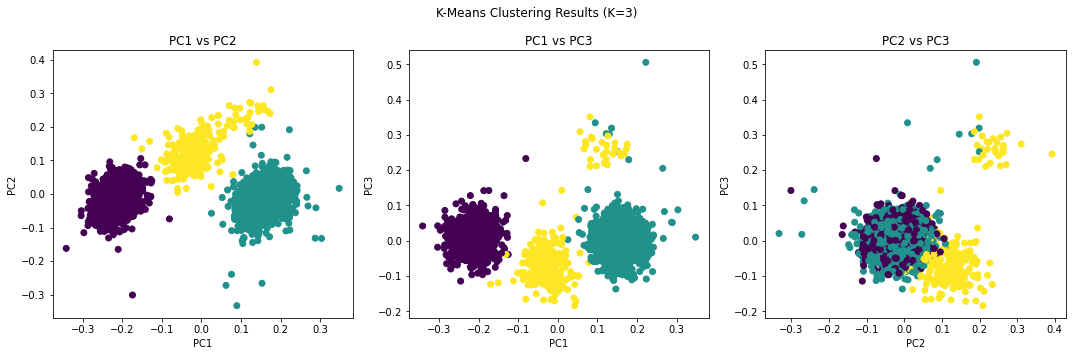

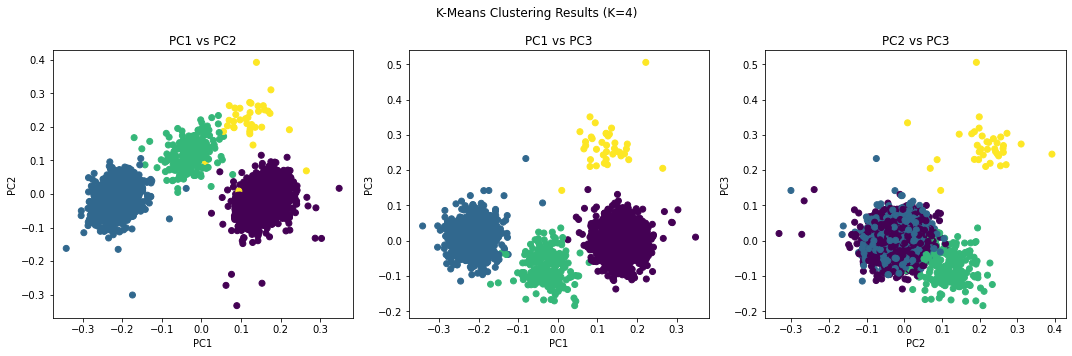

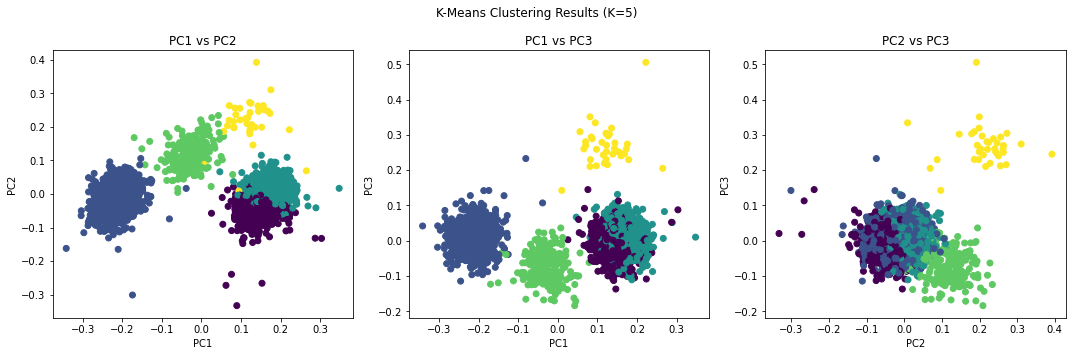

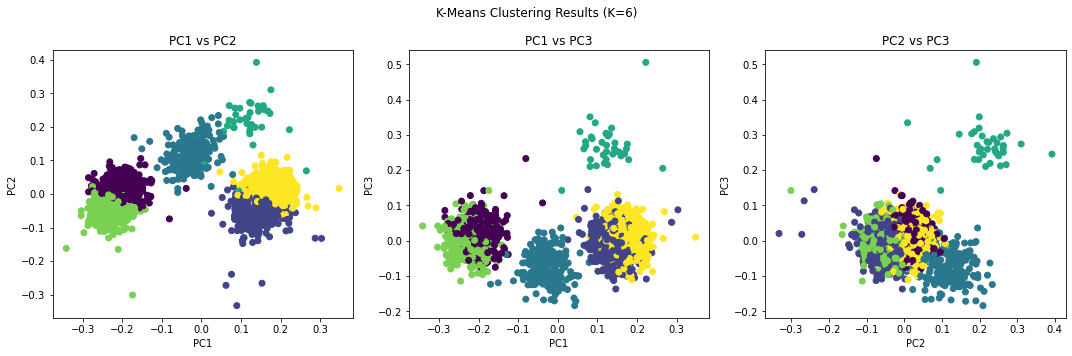

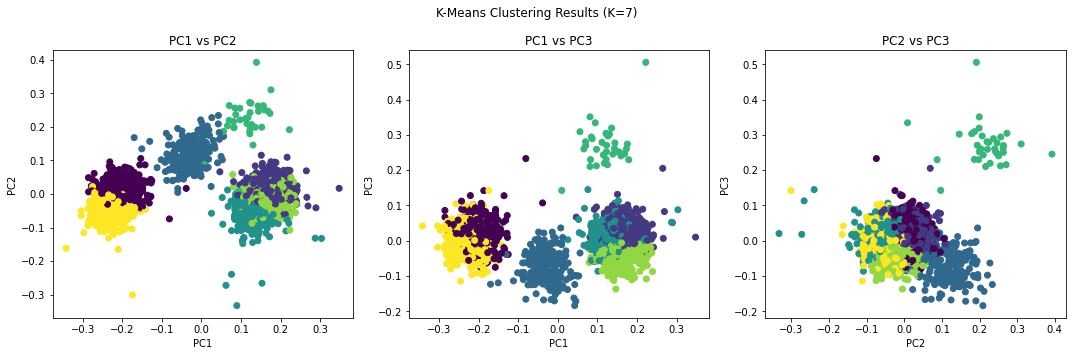

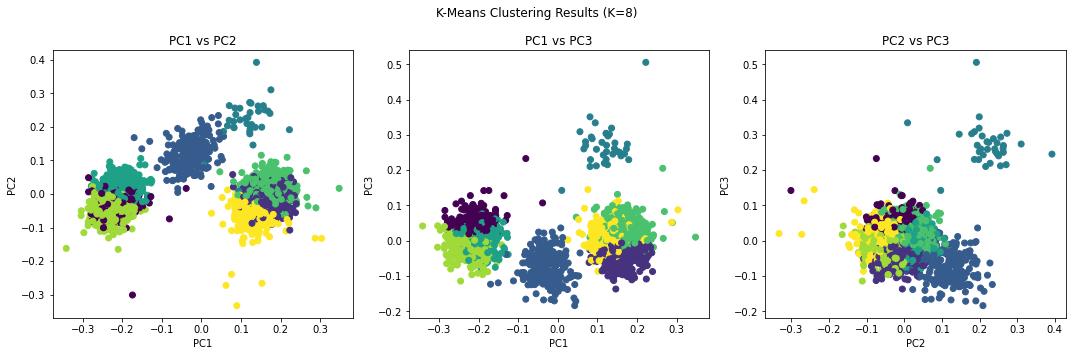

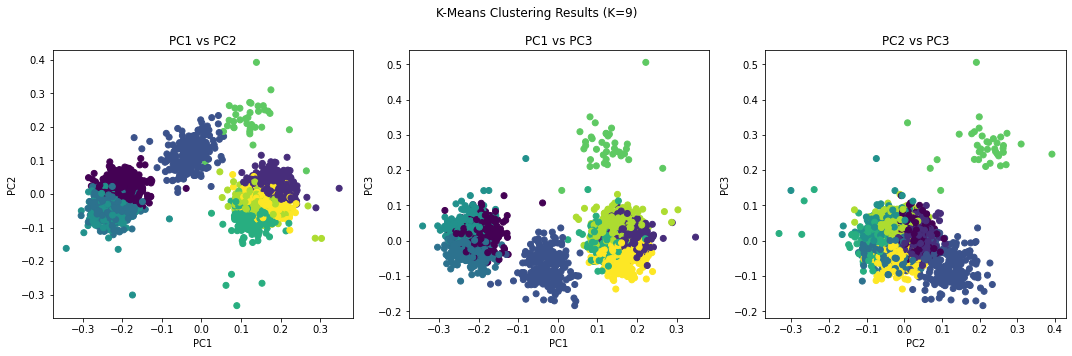

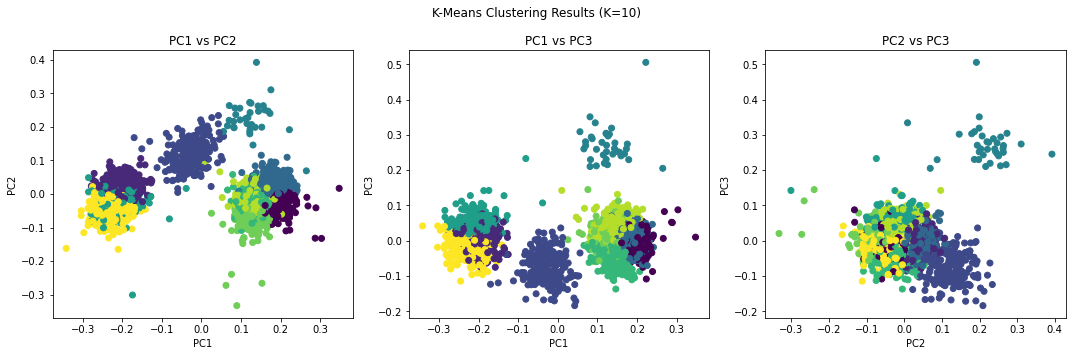

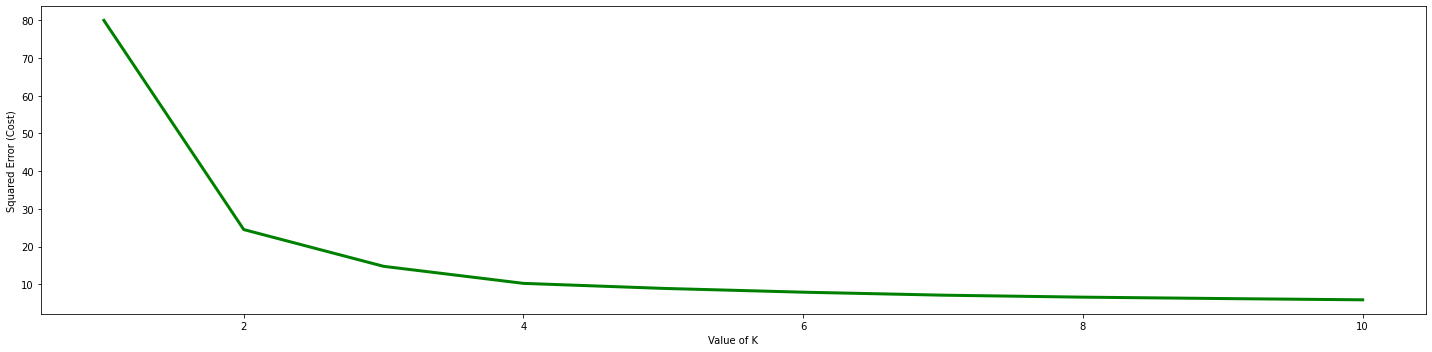

In [21]:
#find the best k with elbow algorithm
cost =[]
for i in range(1, 11):
    KM = KMeans(n_clusters = i)
    KM.fit(pca_waves)
    labels = KM.labels_
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].scatter(pca_waves[:, 0], pca_waves[:, 1], c=labels, cmap='viridis')
    ax[0].set_xlabel('PC1')
    ax[0].set_ylabel('PC2')
    ax[0].set_title('PC1 vs PC2')
    fig.suptitle(f'K-Means Clustering Results (K={i})')

    ax[1].scatter(pca_waves[:, 0], pca_waves[:, 2], c=labels, cmap='viridis')
    ax[1].set_xlabel('PC1')
    ax[1].set_ylabel('PC3')
    ax[1].set_title('PC1 vs PC3')
    
    ax[2].scatter(pca_waves[:, 1], pca_waves[:, 2], c=labels, cmap='viridis')
    ax[2].set_xlabel('PC2')
    ax[2].set_ylabel('PC3')
    ax[2].set_title('PC2 vs PC3')

    plt.show()
    # calculates squared error
    # for the clustered points
    cost.append(KM.inertia_)    
    
plt.plot(range(1, 11), cost, color ='g', linewidth ='3')
plt.xlabel("Value of K")
plt.ylabel("Squared Error (Cost)")
plt.show() # clear the plot
#as we can see in the plot the best k is 4

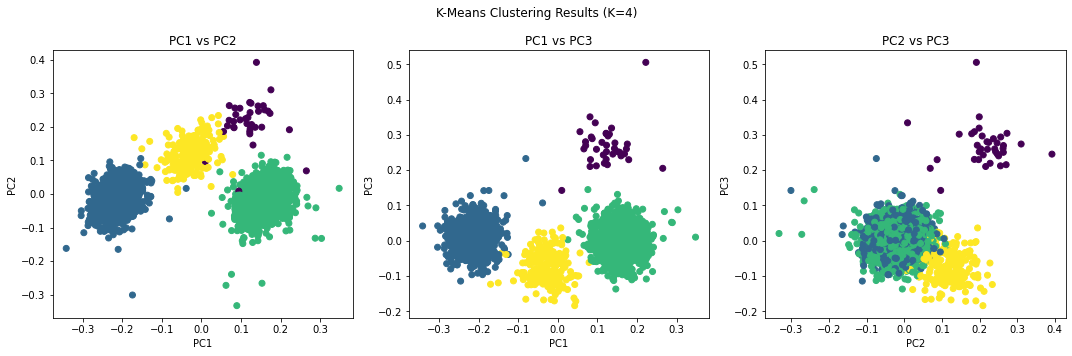

In [22]:
#so we will show these plots with k=4

KM = KMeans(n_clusters = 4).fit(pca_waves)
labels = KM.labels_

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].scatter(pca_waves[:, 0], pca_waves[:, 1], c=labels, cmap='viridis')
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[0].set_title('PC1 vs PC2')
fig.suptitle(f'K-Means Clustering Results (K=4)')

ax[1].scatter(pca_waves[:, 0], pca_waves[:, 2], c=labels, cmap='viridis')
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC3')
ax[1].set_title('PC1 vs PC3')
    
ax[2].scatter(pca_waves[:, 1], pca_waves[:, 2], c=labels, cmap='viridis')
ax[2].set_xlabel('PC2')
ax[2].set_ylabel('PC3')
ax[2].set_title('PC2 vs PC3')

plt.show()

In [23]:
spikes = scipy.io.loadmat('./data/spikes.mat')
spikes_data = spikes['SpikeInds'][0]
spikes_data.shape

(4779,)

In [24]:
peaks_index_th_p = np.copy(peaks_index_th)
peaks_index_th_p = [x+1 for x in peaks_index_th_p]
true_labels = np.zeros(4632000)
for i in spikes_data:
    true_labels[i] = 1
    
our_labels = np.zeros(4632000)

for i in peaks_index_th_p:
    our_labels[i] = 1

In [25]:
type(true_labels[2719])
true_labels[2719]
# spikes_data[0]

1.0

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00   4627221
     class 1       0.10      0.04      0.06      4779

    accuracy                           1.00   4632000
   macro avg       0.55      0.52      0.53   4632000
weighted avg       1.00      1.00      1.00   4632000



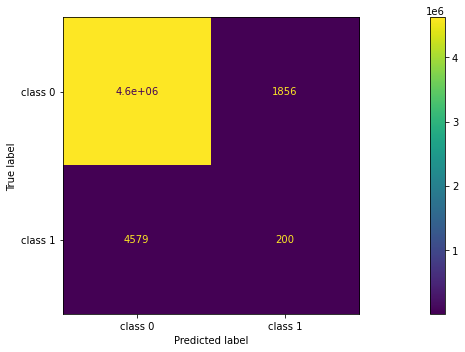

confusion matrix :[[4625365    1856]
 [   4579     200]]

accuracy :0.9986107512953368


In [26]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

target_names = ['class 0', 'class 1']
print(classification_report(true_labels, our_labels, target_names=target_names))
confusion_m = confusion_matrix(true_labels, our_labels)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_m, display_labels = target_names)
cm_display.plot()
plt.show()
print(f"confusion matrix :{confusion_m}")
print(f"\naccuracy :{accuracy_score(true_labels, our_labels)}")

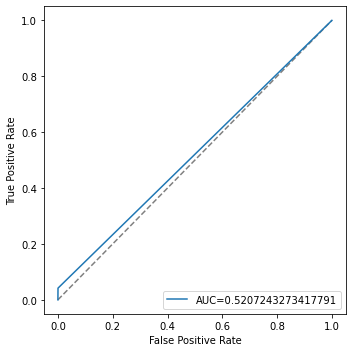

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, _ = roc_curve(true_labels, our_labels)
auc = roc_auc_score(true_labels, our_labels)

#create ROC curve
plt.rcParams["figure.figsize"] = [5, 5]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
plt.plot([0,1],[0,1],color = 'gray',linestyle='--')
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()


In [28]:
new_theta = 0.9 * np.max(signal_data_filterd)
new_theta

0.40486319590673453

In [29]:
peaks_index_th_new = []
for i in peaks_index:
    if signal_data_filterd[i] >=new_theta:
        peaks_index_th_new.append(i)
        
len(peaks_index_th_new)

3

In [32]:
peaks_waveform_new = []
for i in peaks_index_th_new:
    a = -5
    for j in range(0,10):
        peaks_waveform_new.append(signal_data_filterd[a+i+j])
        
len(peaks_waveform_new)

30

In [33]:
peaks_waveform_new = np.array(peaks_waveform_new)

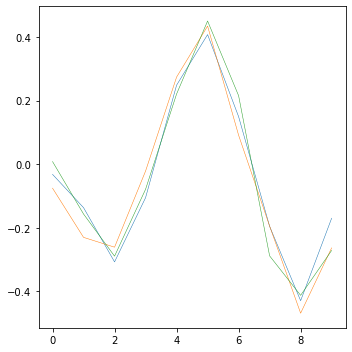

In [34]:
index = 0
for i in range(0,int(len(peaks_waveform_new)/10)):
    plt.plot(peaks_waveform_new[index:index+10],linewidth=0.5)
    index = index+10
    
plt.show()

In [35]:
n = peaks_waveform_new.shape
peaks_waveform_new = peaks_waveform_new.reshape(int(int(n[0])/10),10) 

In [36]:
peaks_waveform_new.shape

(3, 10)

In [38]:
peaks_index_th_p_new = np.copy(peaks_index_th_new)
peaks_index_th_p_new = [x+1 for x in peaks_index_th_p_new]
    
our_labels_new = np.zeros(4632000)

for i in peaks_index_th_p_new:
    our_labels_new[i] = 1

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00   4627221
     class 1       0.00      0.00      0.00      4779

    accuracy                           1.00   4632000
   macro avg       0.50      0.50      0.50   4632000
weighted avg       1.00      1.00      1.00   4632000



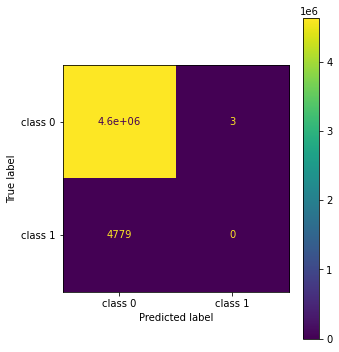

confusion matrix :[[4627218       3]
 [   4779       0]]

accuracy :0.9989676165803109


In [39]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

target_names = ['class 0', 'class 1']
print(classification_report(true_labels, our_labels_new, target_names=target_names))
confusion_m = confusion_matrix(true_labels, our_labels_new)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_m, display_labels = target_names)
cm_display.plot()
plt.show()
print(f"confusion matrix :{confusion_m}")
print(f"\naccuracy :{accuracy_score(true_labels, our_labels_new)}")

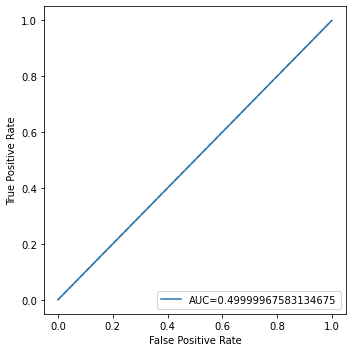

In [41]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, _ = roc_curve(true_labels, our_labels_new)
auc = roc_auc_score(true_labels, our_labels_new)

#create ROC curve
plt.rcParams["figure.figsize"] = [5, 5]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
plt.plot([0,1],[0,1],color = 'gray',linestyle='--')
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

/Users/hediyeraisy/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/hediyeraisy/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


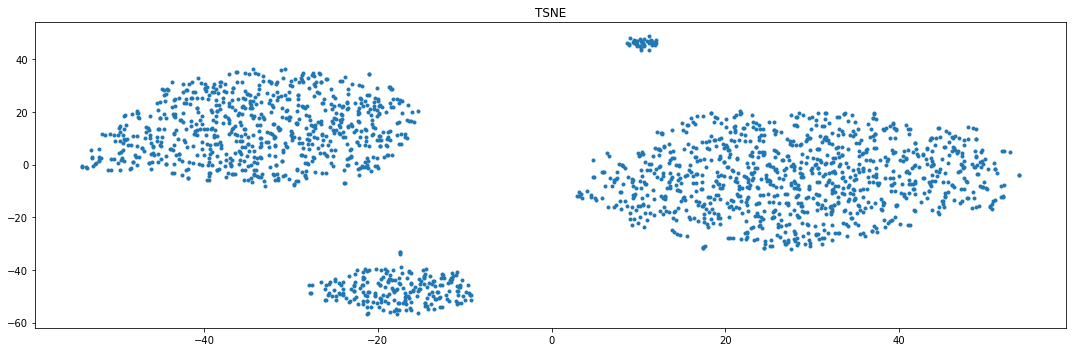

In [44]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
tsne_waves = tsne.fit_transform(peaks_waveform)
tsne_waves.shape

plt.figure(figsize=(15,5))
plt.plot(tsne_waves[:,0], tsne_waves[:,1],'.')
plt.title('TSNE')
plt.show()